C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


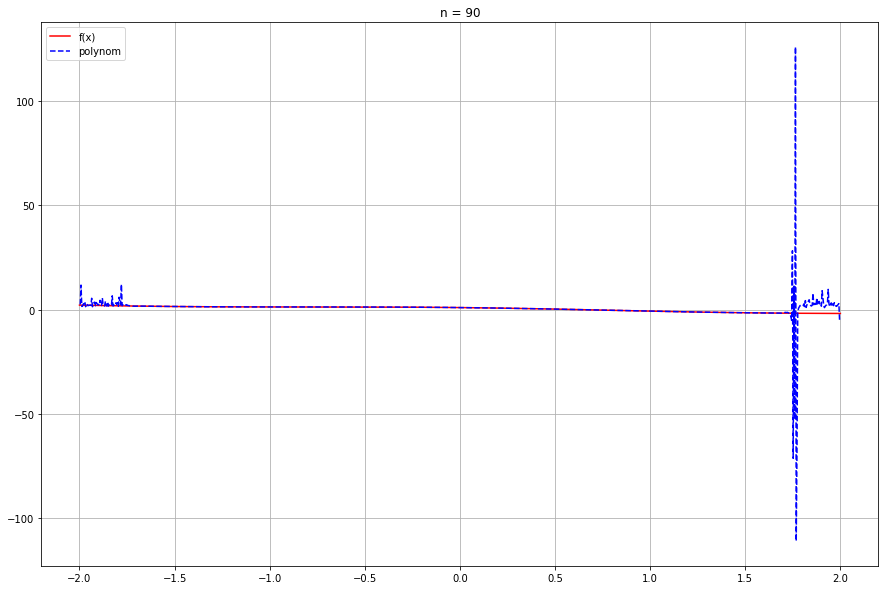

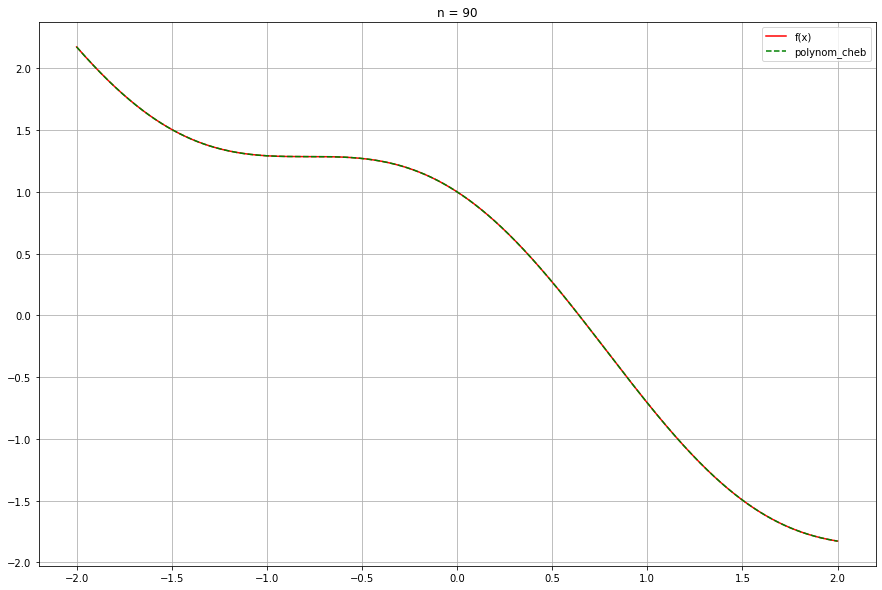

127.70328322270198
2.886579864025407e-15


In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt
from pylab import *

#исходная функция
func_x = np.linspace(-2.0, 2.0, 1000)
func_y = [math.cos(x)* math.cos(x) - x for x in func_x]

# вычисление интерполяционного полинома в барицентрической форме
def bar_form(x, y, val):
    v=[]
    for i in range(len(x)):
        x_=1.0
        for j in range(len(x)):
            if i == j:
                continue
            x_*= x[i]-x[j]
        v.append(1.0/x_)

    chisl = 0; znam = 0
    for i in range(len(y)):
            koef=v[i]/(val-x[i])
            znam+=koef
            chisl+=y[i]*koef
    return chisl/znam

# интерполяция функции по узлам Чебышева
def interpolate_cheb(a, b, nodes_cnt):
    nodes_x = np.asarray([0.5 * (a + b) + 0.5 * (b - a) * cos(pi * (2 * k - 1) / (2 * nodes_cnt))
                       for k in range(1, nodes_cnt + 1)], dtype = np.float64)
    nodes_y = np.asarray([math.cos(x)* math.cos(x) - x for x in nodes_x], dtype = np.float64)

    x = np.linspace(a, b, 1000)
    y = [bar_form(nodes_x, nodes_y, x_val) for x_val in x]

    return x, y

# интерполяция функции по равноотстоящим узлам
def interpolate(a, b, nodes_cnt):
    nodes_x = np.linspace(a, b, nodes_cnt)
    nodes_y = [math.cos(x)* math.cos(x) - x for x in nodes_x]

    x = np.linspace(a,b, 1000)
    y = [bar_form(nodes_x, nodes_y, x_val) for x_val in x]

    return x, y
    
    
# построение графика для равноотстоящих узлов
def draw_plot(x, y, n):
    fig = plt.figure(figsize=(15,10))
    ax = plt.subplot(111)
    ax.plot(func_x, func_y, 'r-',  label = 'f(x)')
    ax.plot(x, y, 'b--', label = 'polynom')
    plt.grid(True)
    plt.title('n = {}'.format(n))
    ax.legend()
    show()
    
# построение графика для чебышевских узлов
def draw_plot_cheb(x, y, n):
    fig = plt.figure(figsize=(15,10))
    ax = plt.subplot(111)
    ax.plot(func_x, func_y, 'r-',  label = 'f(x)')
    ax.plot(x, y, 'g--', label = 'polynom_cheb')
    plt.grid(True)
    plt.title('n = {}'.format(n))
    ax.legend()
    show()


n=90
x1 = []; y1 = []
x1, y1 = interpolate (-2.0, 2.0, n)

x2 = []; y2 = []
x2, y2 = interpolate_cheb (-2.0, 2.0,n)

draw_plot(x1,y1,n)
draw_plot_cheb (x2,y2,n)


max_n1 = 0
max_n2 = 0
for i in range(1000):
    max_n1 = max(max_n1, abs(y1[i] - func_y[i]))
    max_n2 = max(max_n2, abs(y2[i] - func_y[i]))
print(max_n1)
print(max_n2)
